In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import tensorflow as tf

# Load the dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Convert the dataset into a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=cancer_data.feature_names)
df['target'] = y

# Split the DataFrame into features and labels
features = df.drop('target', axis=1)
labels = df['target']

# Convert the DataFrame into TensorFlow Dataset
# Note: Further splitting into train/test sets and batching would be needed
dataset = tf.data.Dataset.from_tensor_slices((features.values, labels))


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize the data: this is crucial for many machine learning algorithms
scaler = StandardScaler()

# Fit the scaler only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(32)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Define the number of epochs for training
epochs = 50

# Train the model
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset
)


Epoch 1/50
15/15 [==============================] - 4s 16ms/step - loss: 0.8334 - accuracy: 0.5626 - val_loss: 0.5475 - val_accuracy: 0.6491
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6549 - val_loss: 0.4441 - val_accuracy: 0.7982
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.6747 - val_loss: 0.3768 - val_accuracy: 0.8333
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7121 - val_loss: 0.3234 - val_accuracy: 0.8947
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4958 - accuracy: 0.7538 - val_loss: 0.2823 - val_accuracy: 0.9123
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4054 - accuracy: 0.8000 - val_loss: 0.2469 - val_accuracy: 0.9386
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.8330 - val_loss: 0.2157 - val_accuracy: 0.9561
Epoch 8/50
15/15 [=

In [8]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


4/4 [==============================] - 0s 11ms/step - loss: 0.0604 - accuracy: 0.9912
Test Loss: 0.06042968109250069
Test Accuracy: 0.9912280440330505


In [9]:
from tensorflow.keras.optimizers import Adam

# Adjust the learning rate
new_learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=new_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
# Retrain the model with the adjusted parameters
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset
)


Epoch 1/50
15/15 [==============================] - 2s 21ms/step - loss: 0.0886 - accuracy: 0.9714 - val_loss: 0.0603 - val_accuracy: 0.9912
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 0.9736 - val_loss: 0.0602 - val_accuracy: 0.9912
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0626 - accuracy: 0.9846 - val_loss: 0.0601 - val_accuracy: 0.9912
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0972 - accuracy: 0.9604 - val_loss: 0.0601 - val_accuracy: 0.9912
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.0601 - val_accuracy: 0.9912
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0996 - accuracy: 0.9648 - val_loss: 0.0600 - val_accuracy: 0.9912
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9736 - val_loss: 0.0599 - val_accuracy: 0.9912
Epoch 8/50
15/15 [=

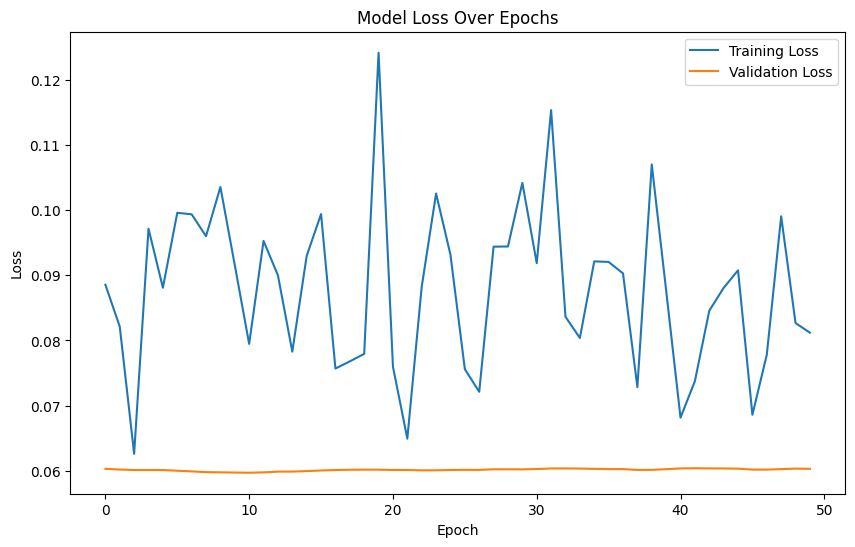

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


Epoch 1/50
15/15 [==============================] - 7s 17ms/step - loss: 0.9912 - accuracy: 0.5143 - val_loss: 0.6733 - val_accuracy: 0.5526
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.7567 - accuracy: 0.5934 - val_loss: 0.5635 - val_accuracy: 0.7632
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6516 - accuracy: 0.6615 - val_loss: 0.4854 - val_accuracy: 0.9035
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6201 - accuracy: 0.6967 - val_loss: 0.4114 - val_accuracy: 0.9386
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4835 - accuracy: 0.7736 - val_loss: 0.3532 - val_accuracy: 0.9474
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8198 - val_loss: 0.3119 - val_accuracy: 0.9474
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3703 - accuracy: 0.8418 - val_loss: 0.2742 - val_accuracy: 0.9649
Epoch 8/50
15/15 [=

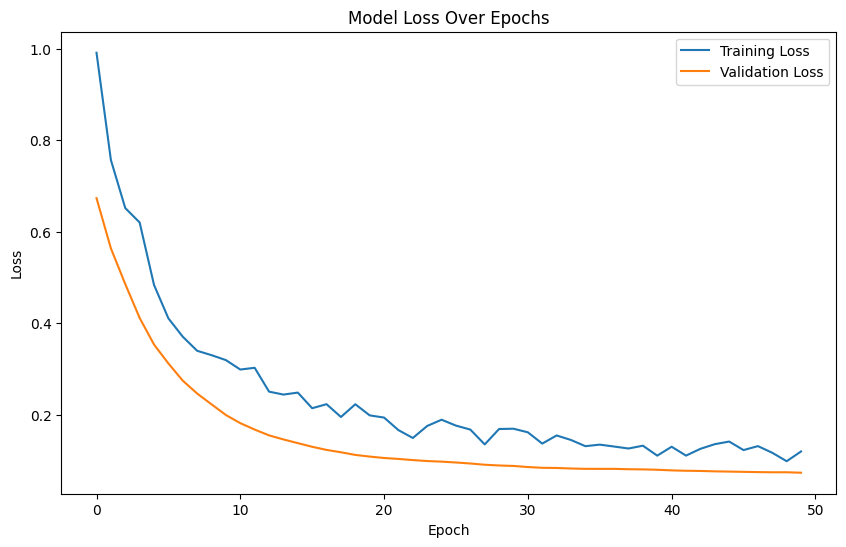

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import tensorflow as tf

# Load the data
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to TensorFlow datasets and batch them
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(batch_size)

# Define the model with added BatchNormalization and increased Dropout
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with a potentially lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=test_dataset,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [14]:
# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [15]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming `X_train` is your training data
scaler = StandardScaler().fit(X_train)

# Save the scaler object to a file
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [ ]:
!pip install streamlit
